DATASET DESCRPTION:

#The Crime Dataset is about Crimes which have taken place in India over the years. 
#This dataset has 600 Rows and 14 Columns, which offers valuable insights for crime-pattern based analysis,policy-making and crime prevention strategies
#The various attributes or features of the dataset are:

#Date Reported: The date on which the crime was officially reported to authorities, aiding in understanding reporting delays and their patterns.

#Date of Occurrence: The actual date when the crime took place, useful for analyzing crime trends over time.

#Time of Occurrence: The specific time when the crime occurred, helping to identify high-risk time periods for various types of crimes.

#City: The city where the crime was reported, enabling geographic crime mapping and regional comparisons.

#Crime Code: A unique identifier or code assigned to each type of crime, facilitating categorical analysis and trend identification.

#Crime Description: A detailed narrative or classification of the crime committed, offering qualitative context for the incident.

#Victim Age: The age of the victim involved, useful for demographic analysis and vulnerability assessments.

#Victim Gender: The gender of the victim, providing insights into gender-specific crime patterns and prevention strategies.

#Weapon Used: Information on the weapon or tools used in the crime, aiding in understanding crime severity and planning countermeasures.

#Crime Domain: The broader category or domain of the crime (e.g., Violent,Traffic Fatality), helping to classify and study crimes within specific areas.

#Police Deployed: The number or type of police personnel involved in responding to or investigating the crime, useful for resource allocation analysis.

#Case Closed: A binary attribute indicating whether the case has been resolved (closed) or is still open, useful for evaluating the efficiency of the judicial and law enforcement processes.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The primary motive for analyzing the crimes dataset is to understand trends, patterns, and demographics of crimes across different regions and timeframes. This helps in identifying high-risk areas, optimizing resource allocation, and developing targeted strategies for crime prevention. Insights can guide policymakers, law enforcement, and public awareness campaigns to enhance safety and reduce crime rates. Additionally, the analysis supports judicial processes by identifying factors influencing case closures and delays. Ultimately, the goal is to use data-driven insights to make communities safer and more informed.

In [63]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler


In [7]:
#Importing the dataset
df = pd.read_csv("C:/Users/Sumit Emmanuel/OneDrive/Desktop/BCA/crimes.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       600 non-null    int64 
 1   Date Reported       600 non-null    object
 2   Date of Occurrence  600 non-null    object
 3   Time of Occurrence  600 non-null    object
 4   City                600 non-null    object
 5   Crime Code          600 non-null    int64 
 6   Crime Description   600 non-null    object
 7   Victim Age          600 non-null    int64 
 8   Victim Gender       600 non-null    object
 9   Weapon Used         511 non-null    object
 10  Crime Domain        600 non-null    object
 11  Police Deployed     600 non-null    int64 
 12  Case Closed         600 non-null    object
 13  Date Case Closed    291 non-null    object
dtypes: int64(4), object(10)
memory usage: 65.8+ KB


In [5]:
df.isnull().sum()

Report Number           0
Date Reported           0
Date of Occurrence      0
Time of Occurrence      0
City                    0
Crime Code              0
Crime Description       0
Victim Age              0
Victim Gender           0
Weapon Used            89
Crime Domain            0
Police Deployed         0
Case Closed             0
Date Case Closed      309
dtype: int64

In [7]:
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02/01/2020 00:00,01/01/2020 00:00,01/01/2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01/01/2020 19:00,01/01/2020 01:00,01/01/2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02/01/2020 05:00,01/01/2020 02:00,01/01/2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01/01/2020 05:00,01/01/2020 03:00,01/01/2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29/04/2020 05:00
4,5,01/01/2020 21:00,01/01/2020 04:00,01/01/2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08/01/2020 21:00


In [8]:
#Change the Date Columns into Date and Time Format
date_columns = ['Date Reported', 'Date of Occurrence', 'Date Case Closed']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_14556\3112226796.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [9]:
#TO REMOVE DATE CASE CLOSED AND REPORT NUMBER COLUMNS/FEATURES
remove = ['Date Case Closed', 'Report Number'] 
df = df.drop(columns=remove, errors='ignore')

df.to_csv('crimes_dataset.csv', index=False)

print("Columns after removal:")
print(df.columns)

Columns after removal:
Index(['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City',
       'Crime Code', 'Crime Description', 'Victim Age', 'Victim Gender',
       'Weapon Used', 'Crime Domain', 'Police Deployed', 'Case Closed'],
      dtype='object')


In [10]:
df.isnull().sum()

Date Reported         346
Date of Occurrence    312
Time of Occurrence      0
City                    0
Crime Code              0
Crime Description       0
Victim Age              0
Victim Gender           0
Weapon Used            89
Crime Domain            0
Police Deployed         0
Case Closed             0
dtype: int64

In [11]:
#TO FILL MISSING CATEGORICAL VALUES WITH MOST FREQUENT VALUE(Weapon Used)
if 'Weapon Used' in df.columns:
    df['Weapon Used'] = df['Weapon Used'].fillna(df['Weapon Used'].mode()[0])

In [12]:
print("Missing Values After Filling:")
print(df.isnull().sum())

Missing Values After Filling:
Date Reported         346
Date of Occurrence    312
Time of Occurrence      0
City                    0
Crime Code              0
Crime Description       0
Victim Age              0
Victim Gender           0
Weapon Used             0
Crime Domain            0
Police Deployed         0
Case Closed             0
dtype: int64


In [13]:
# Forward fill
df['Date Reported'] = df['Date Reported'].ffill()
df['Date of Occurrence'] = df['Date of Occurrence'].ffill()

# Backward fill
df['Date Reported'] = df['Date Reported'].bfill()
df['Date of Occurrence'] = df['Date of Occurrence'].bfill()

In [14]:
print("Missing Values After Filling:")
print(df.isnull().sum())

Missing Values After Filling:
Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date Reported       600 non-null    datetime64[ns]
 1   Date of Occurrence  600 non-null    datetime64[ns]
 2   Time of Occurrence  600 non-null    object        
 3   City                600 non-null    object        
 4   Crime Code          600 non-null    int64         
 5   Crime Description   600 non-null    object        
 6   Victim Age          600 non-null    int64         
 7   Victim Gender       600 non-null    object        
 8   Weapon Used         600 non-null    object        
 9   Crime Domain        600 non-null    object        
 10  Police Deployed     600 non-null    int64         
 11  Case Closed         600 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 56.4+ KB


In [5]:
df.dtypes

Report Number          int64
Date Reported         object
Date of Occurrence    object
Time of Occurrence    object
City                  object
Crime Code             int64
Crime Description     object
Victim Age             int64
Victim Gender         object
Weapon Used           object
Crime Domain          object
Police Deployed        int64
Case Closed           object
Date Case Closed      object
dtype: object

In [6]:
df.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,600.000000,600.000000,600.000000,600.000000
mean,300.500000,360.303333,44.348333,9.545000
std,173.349358,140.796665,19.824362,5.495298
min,1.000000,101.000000,10.000000,1.000000
25%,150.750000,247.750000,28.000000,5.000000
50%,300.500000,356.500000,44.000000,9.000000
75%,450.250000,491.000000,61.250000,14.000000
max,600.000000,598.000000,79.000000,19.000000


count    600.000000
mean      44.348333
std       19.824362
min       10.000000
25%       28.000000
50%       44.000000
75%       61.250000
max       79.000000
Name: Victim Age, dtype: float64


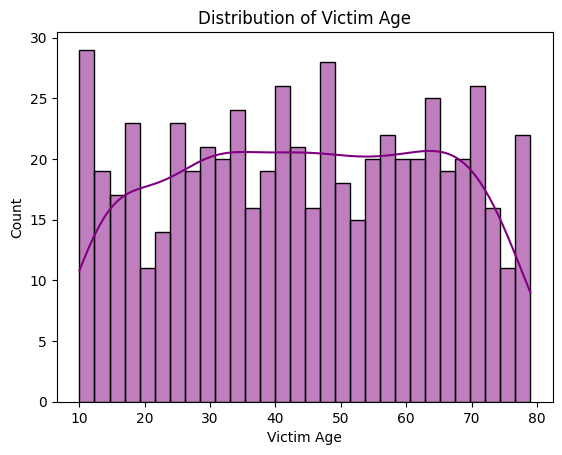

In [16]:
# HistPlot showing Victim Age
numerical_col = 'Victim Age' 
print(df[numerical_col].describe())
sns.histplot(df[numerical_col], kde=True, bins=30, color='purple')
plt.title(f'Distribution of {numerical_col}')
plt.show()

#This Bar Chart is used to show which city has how much distribution of crimes. For Eg: Delhi has the Highest Distribution of any crime

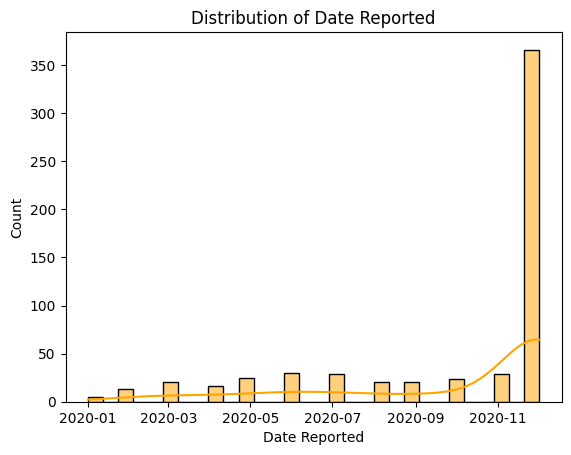

In [17]:
# HistPlot showing Date Reported
numerical_col = 'Date Reported' 
sns.histplot(df[numerical_col], kde=True, bins=30, color='orange')
plt.title(f'Distribution of {numerical_col}')
plt.show()
#This shows the Count of crimes reported in 2020 and it can be seen that there is a sudden surge of reporting in October and November. 
#This is likely due to the fact that the data is from 2020 and the COVID-pandemic had made everyone  more vigilant and aware of the crimes happening

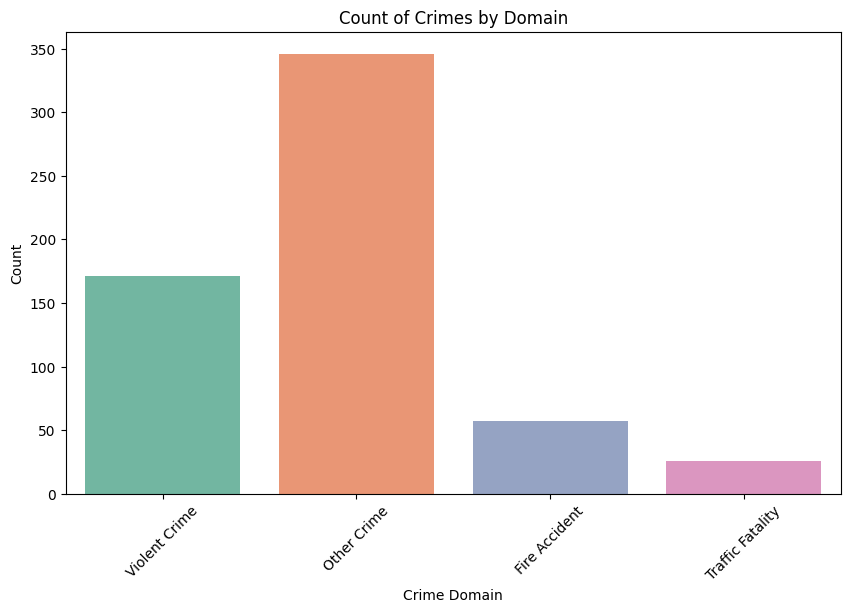

In [18]:

plt.figure(figsize=(10, 6))
sns.countplot(df, x='Crime Domain', hue='Crime Domain', dodge=False, legend=False, palette='Set2')
plt.title('Count of Crimes by Domain')
plt.xlabel('Crime Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# This displays the Count based on Crime Domain, the next after various crimes are 170 on average


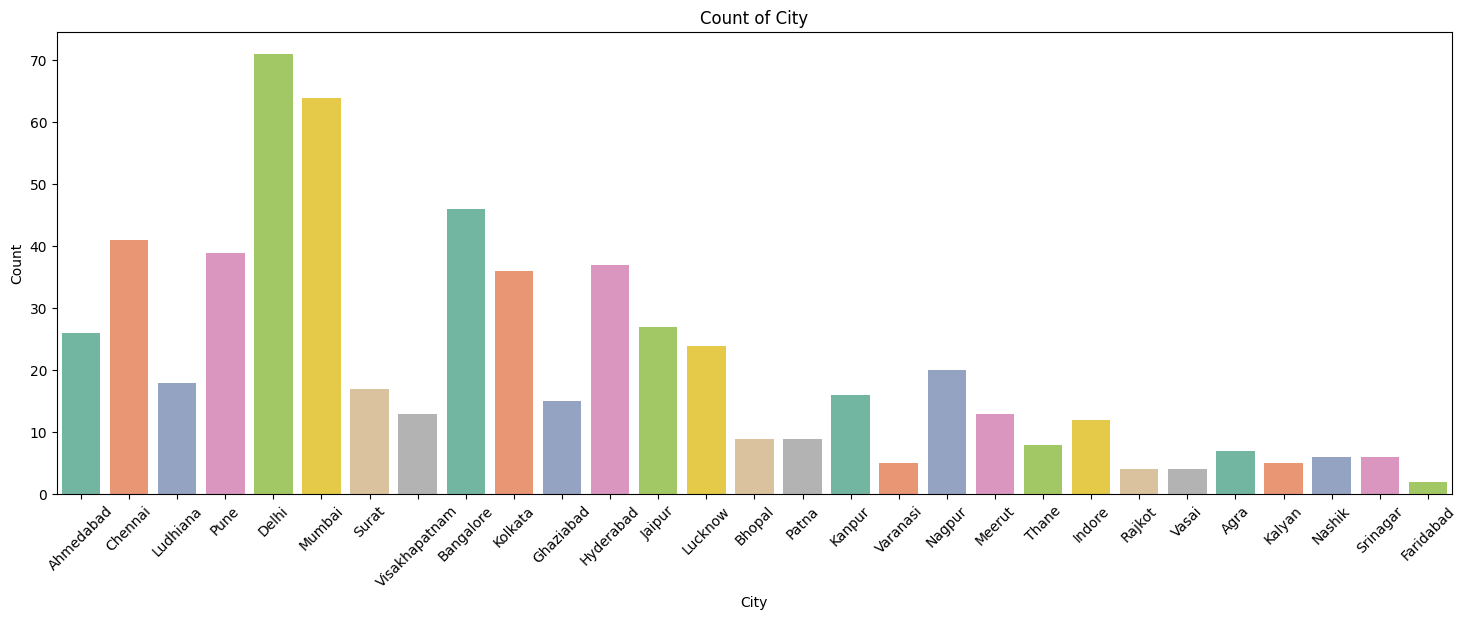

In [19]:
# Example for one variable: 'City'
plt.figure(figsize=(18, 6))
sns.countplot(df, x='City', hue='City', dodge=False, legend=False, palette='Set2')
plt.title('Count of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This Shows which city in the country has the highest crime rate based on the dataset. As per this it is Delhi followed by Mumbai

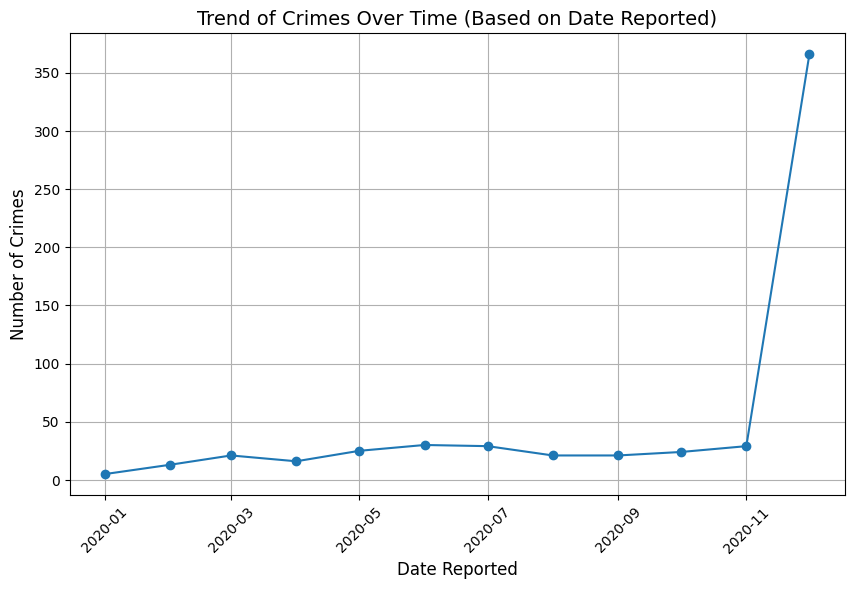

In [21]:
crime_trend = df.groupby(df['Date Reported'].dt.date).size()
plt.figure(figsize=(10, 6))
plt.plot(crime_trend.index, crime_trend.values, marker='o', linestyle='-')
plt.title("Trend of Crimes Over Time (Based on Date Reported)", fontsize=14)
plt.xlabel("Date Reported", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

#Interpretation:
#This Line Chart is used to show the trends of crimes reported based on Date of Reporting of Crime 
#For Eg: In July of 2020 on average 30 Crimes were reported daily

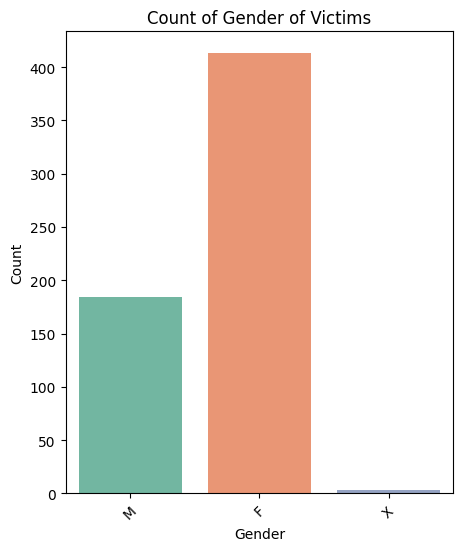

In [22]:
# Example for one variable: 'City'
plt.figure(figsize=(5, 6))
sns.countplot(df, x='Victim Gender', hue='Victim Gender', dodge=False, legend=False, palette='Set2')
plt.title('Count of Gender of Victims')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This shows the Count of Victims by Gender. Maximum of the victims on whom the crimes are perpetrated despite the Domain and Description are Women

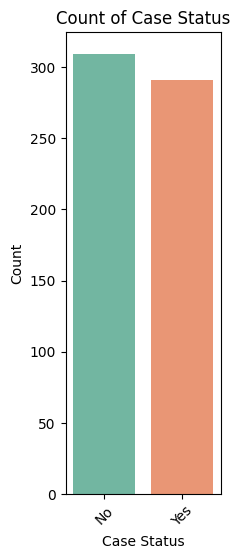

In [23]:
# Example for one variable: 'City'
plt.figure(figsize=(2, 6))
sns.countplot(df, x='Case Closed', hue='Case Closed', dodge=False, legend=False, palette='Set2')
plt.title('Count of Case Status')
plt.xlabel('Case Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This shows the count of Case Statuses, Unfortunately maximum cases have not been solved yet due 
# to delay in the due process of law proceedings and finding of evidence also due to no witnesses agreeing to testify  

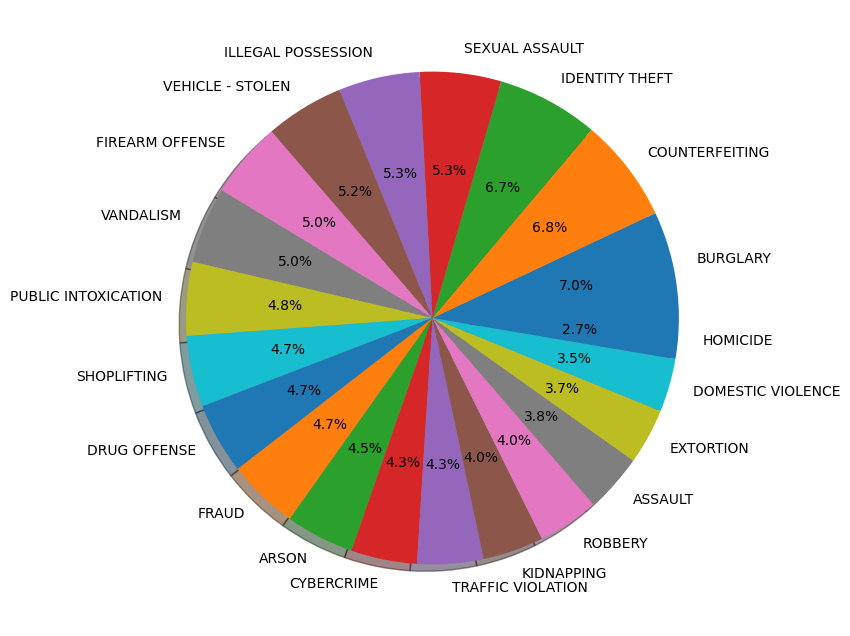

In [27]:
name = df['Crime Description'].value_counts().index
val = df['Crime Description'].value_counts().values


plt.figure(figsize = (8,8))
plt.pie(x = val , labels  = name , shadow = True , autopct = '%1.1f%%')
plt.show()

<Axes: xlabel='Police Deployed', ylabel='Count'>

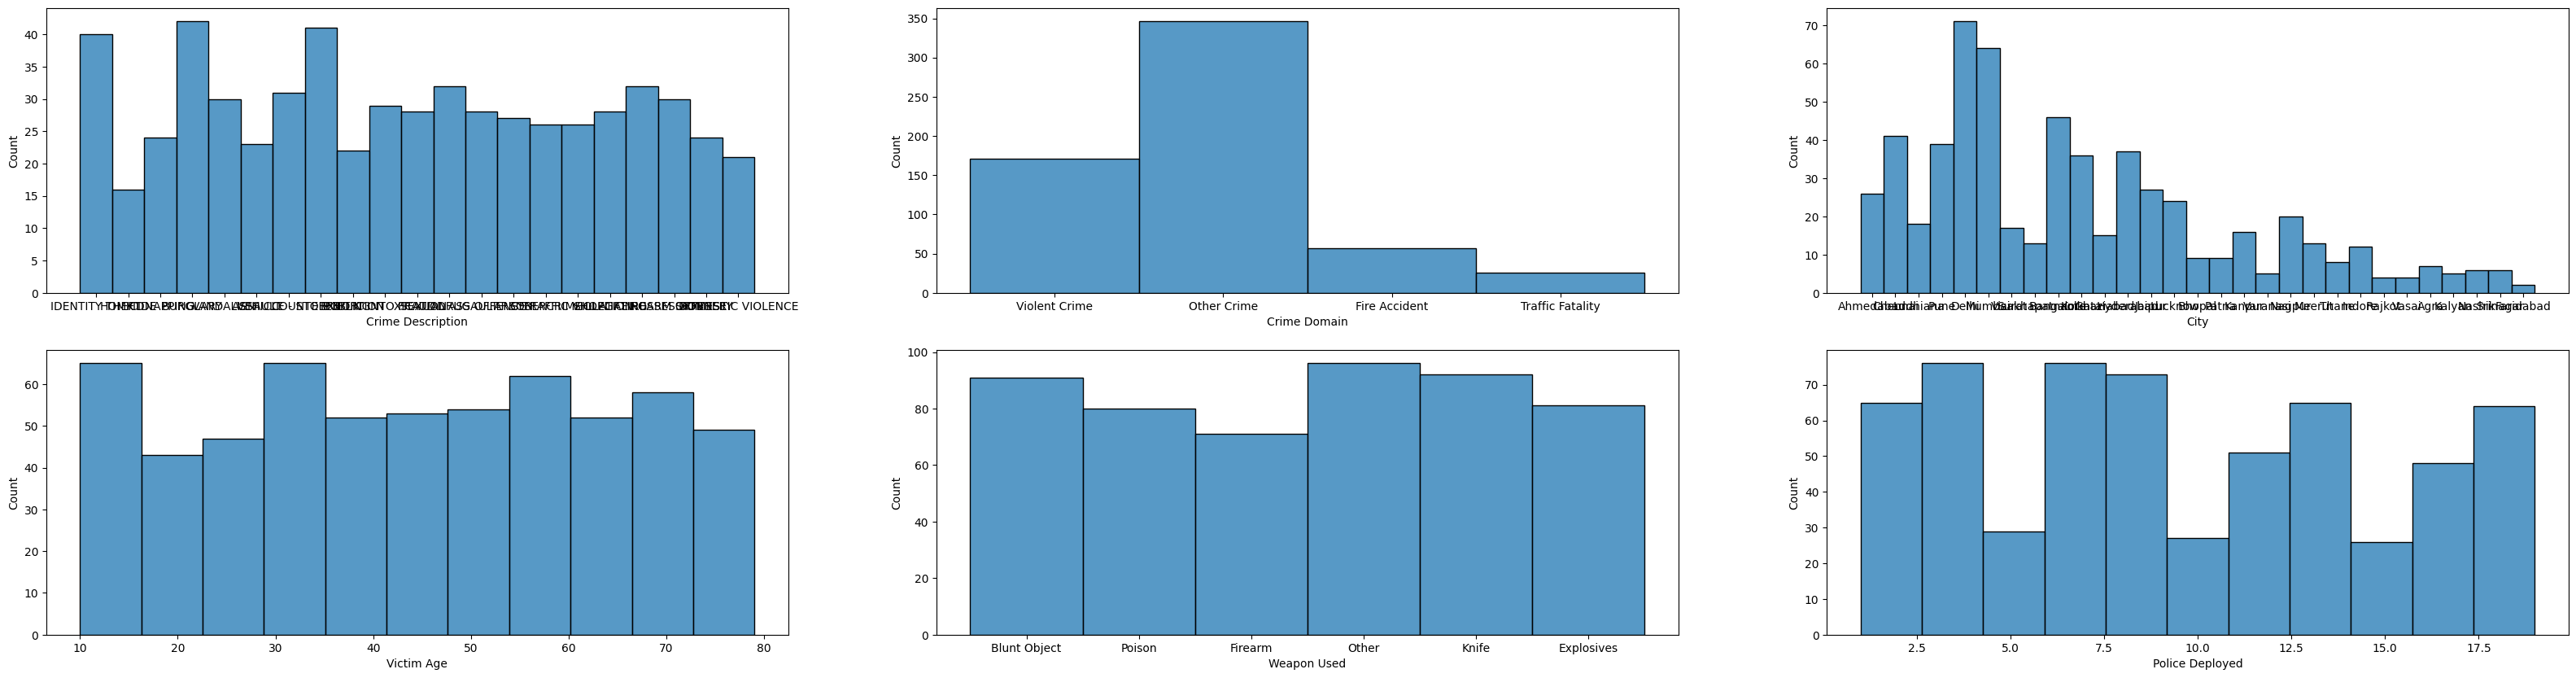

In [9]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,3,figsize=(40,10))
sns.histplot(df["Crime Description"],ax=axes[0,0])
sns.histplot(df["Crime Domain"],ax=axes[0,1])
sns.histplot(df["City"],ax=axes[0,2])
sns.histplot(df["Victim Age"],ax=axes[1,0])
sns.histplot(df["Weapon Used"],ax=axes[1,1])
sns.histplot(df["Police Deployed"],ax=axes[1,2])

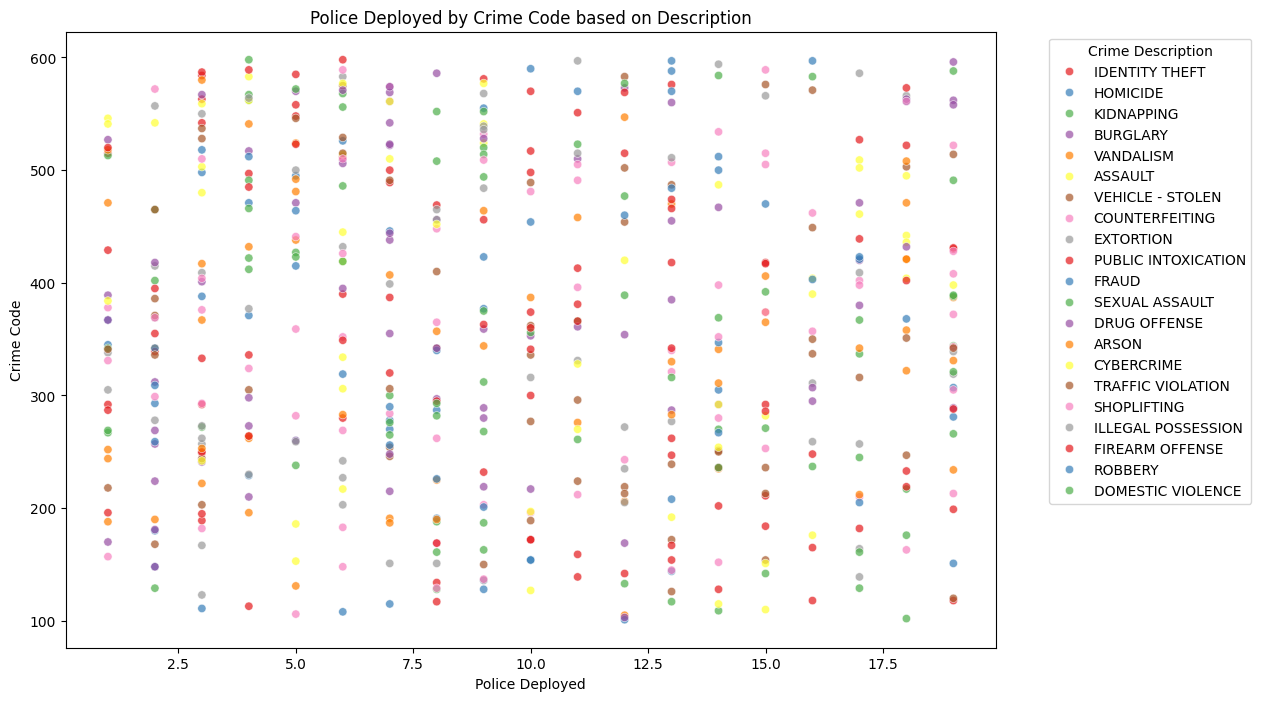

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(df,x="Police Deployed",y="Crime Code",hue='Crime Description',palette='Set1', alpha=0.7)
plt.title("Police Deployed by Crime Code based on Description")
plt.xlabel("Police Deployed")
plt.ylabel("Crime Code")
plt.legend(title="Crime Description",bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()
#This Scatter Plot helps to analyze the Average Deployment of Police by Crime Description and also the various crime Codes

C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_25012\1925825035.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='Weapon Used', columns='Age Group', aggfunc='size', fill_value=0)


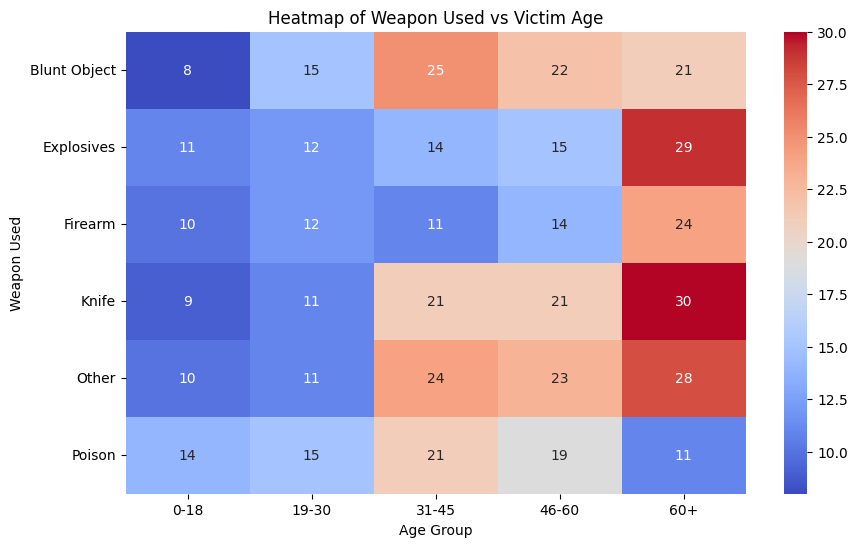

In [11]:
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Victim Age'], bins=age_bins, labels=age_labels, right=False)

pivot_table = df.pivot_table(index='Weapon Used', columns='Age Group', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Weapon Used vs Victim Age')
plt.ylabel('Weapon Used')
plt.xlabel('Age Group')
plt.show()

#Interpretation: This shows Weapons Used and Victims Age, which weapon was used for which victim age group and how it affected them

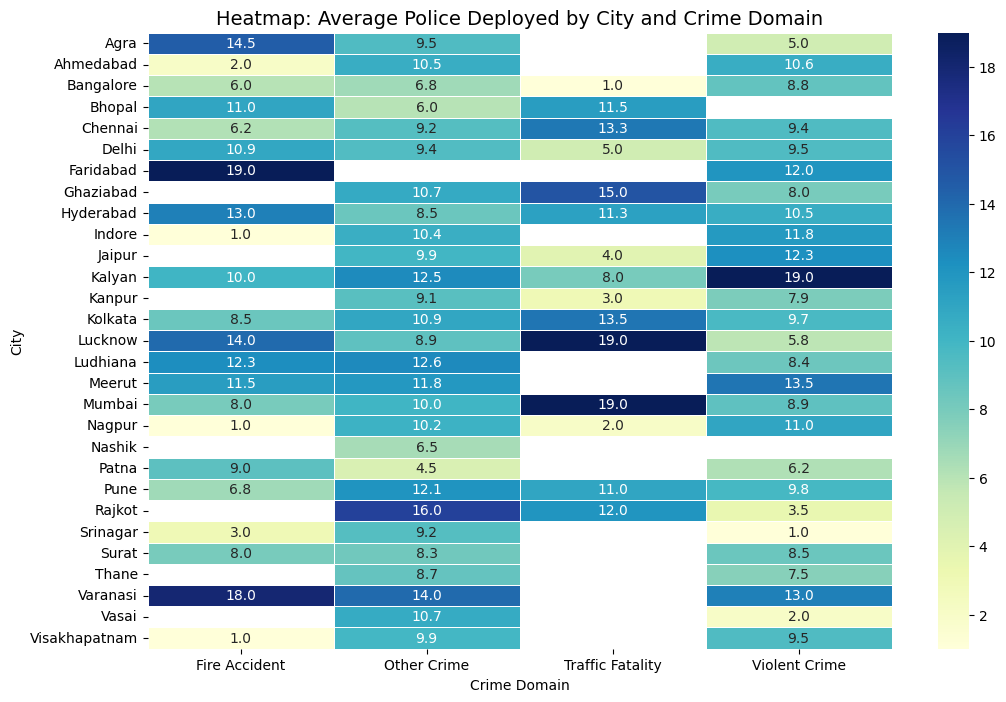

In [12]:
# Average Police Deployment by City and Crime
heatmap_data = df.pivot_table(index='City',columns='Crime Domain',values='Police Deployed',aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Average Police Deployed by City and Crime Domain", fontsize=14)
plt.show()
#Highlights how Police are Deployed across various City depending on the Crime Domain.

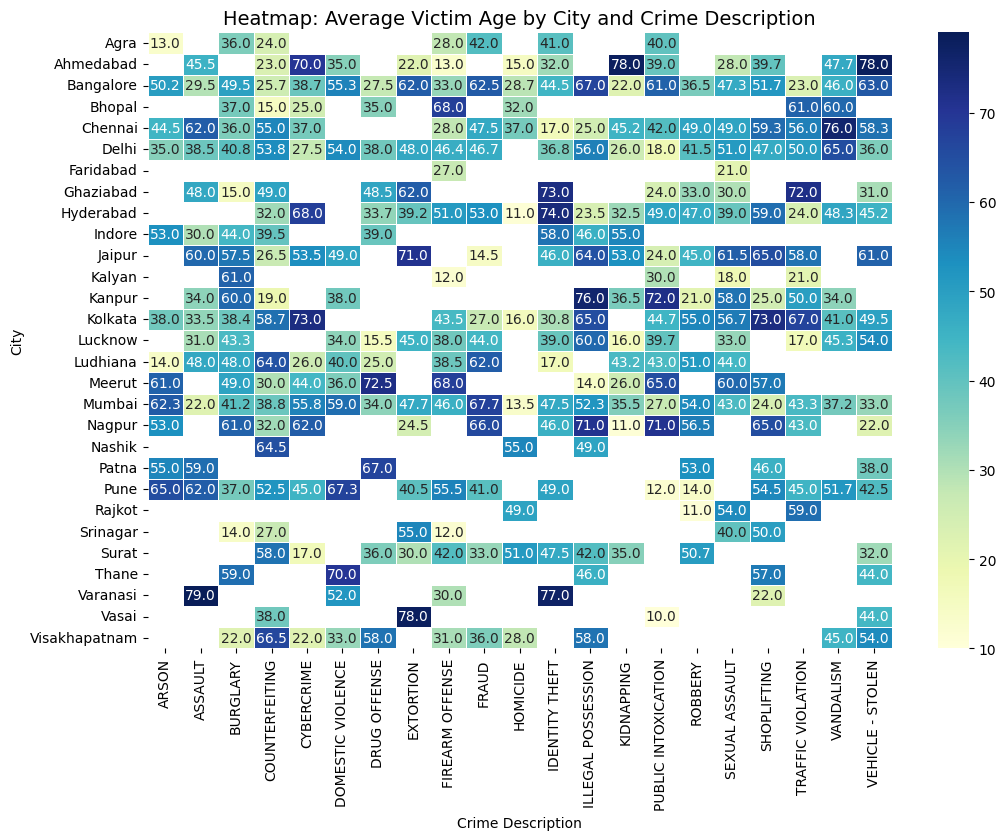

In [13]:
heatmap_data = df.pivot_table(
    index='City',
    columns='Crime Description',
    values='Victim Age',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Average Victim Age by City and Crime Description", fontsize=14)
plt.show()

#This Heat Map Displays the average Victim Age by the City and the Crime. For eg. In NAgpur the Avg Victim Age for Robbery is 56 Years

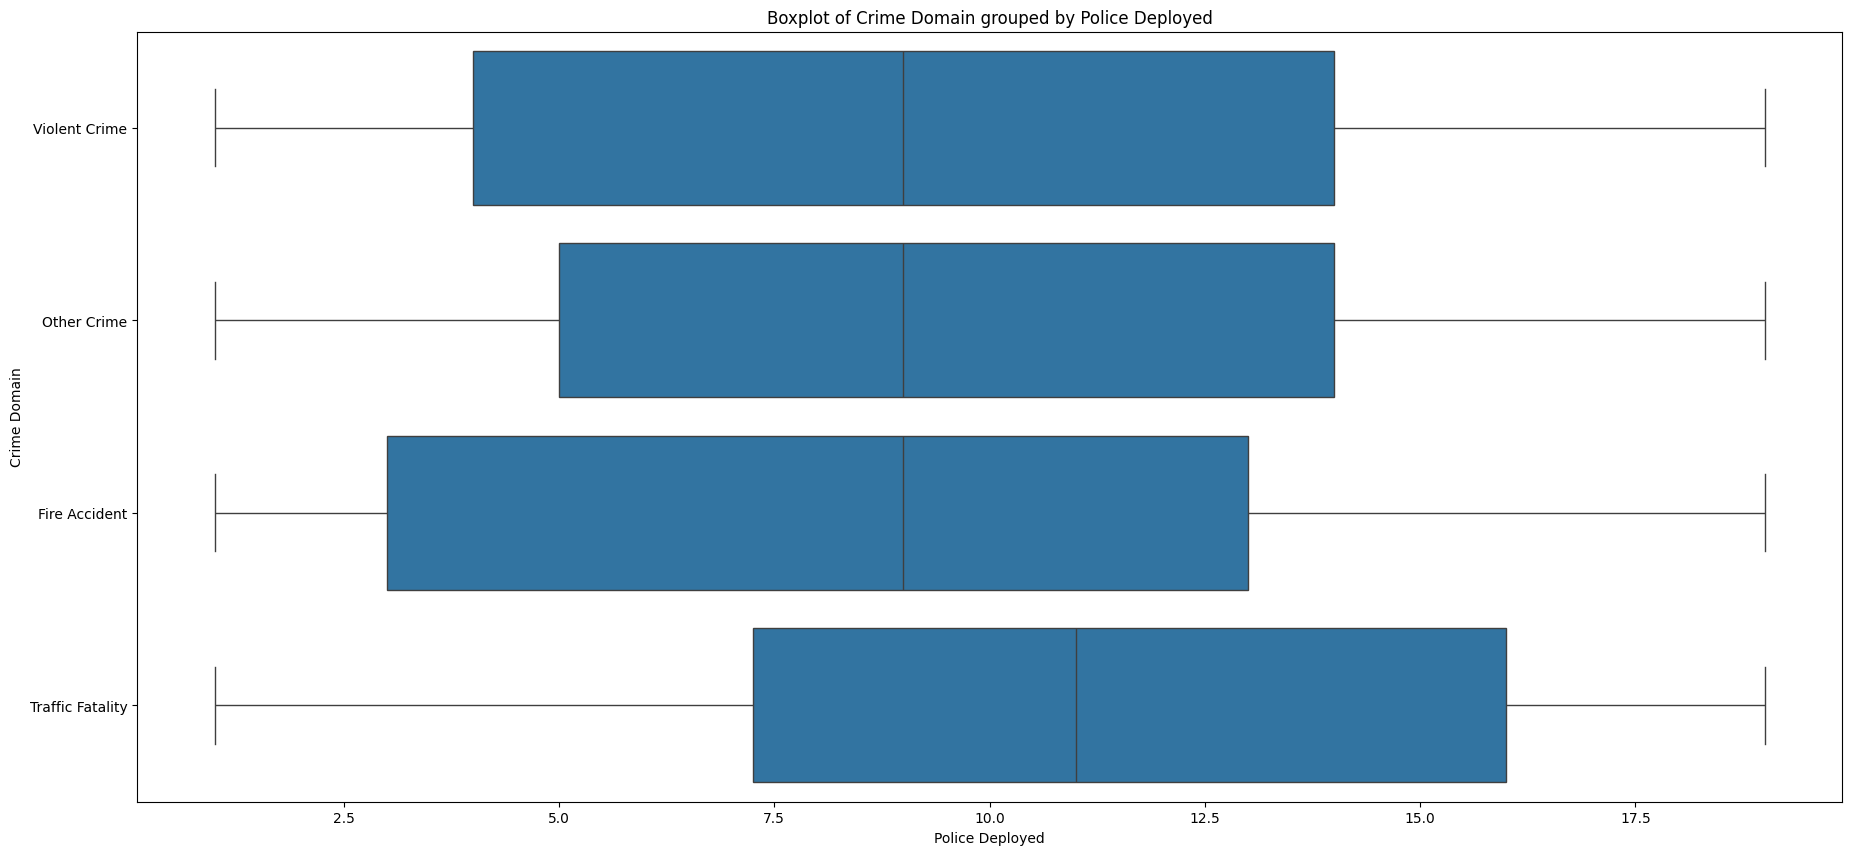

In [14]:
plt.figure(figsize=(22,10))
sns.boxplot(x=df['Police Deployed'], y=df['Crime Domain'])
plt.title(f'Boxplot of {'Crime Domain'} grouped by {'Police Deployed'}')
plt.show()

#This Displays the BoxPlot of Police Deployed for the Crime Domain which are being taking places. The mean for all Crime Domains is 8


EDA for Nominal Data - City
City
Delhi            71
Mumbai           64
Bangalore        46
Chennai          41
Pune             39
Hyderabad        37
Kolkata          36
Jaipur           27
Ahmedabad        26
Lucknow          24
Nagpur           20
Ludhiana         18
Surat            17
Kanpur           16
Ghaziabad        15
Visakhapatnam    13
Meerut           13
Indore           12
Bhopal            9
Patna             9
Thane             8
Agra              7
Nashik            6
Srinagar          6
Varanasi          5
Kalyan            5
Rajkot            4
Vasai             4
Faridabad         2
Name: count, dtype: int64


C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_25012\3207745663.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,y=nominal_column, palette='Set2', order=df[nominal_column].value_counts().index)


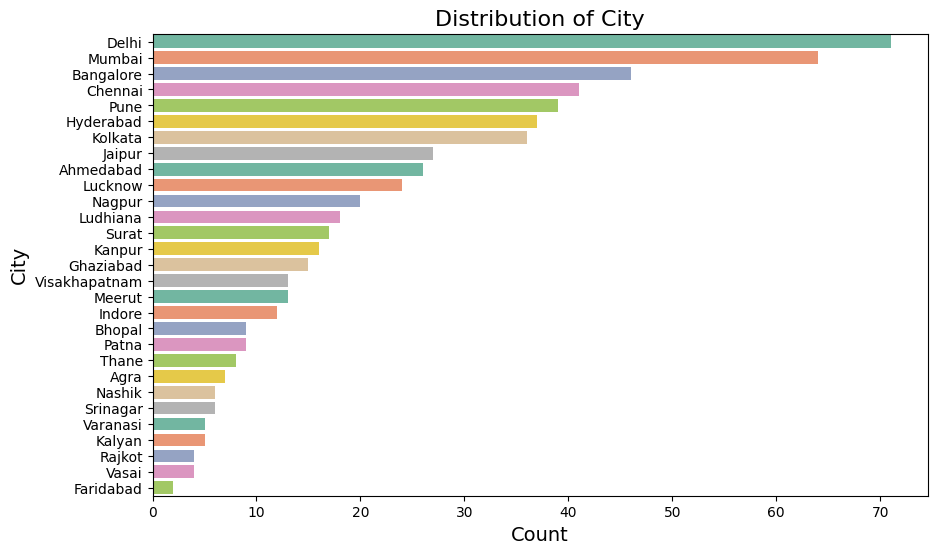


EDA for Ordinal Data - Age Group
Age Group
60+      167
31-45    140
46-60    131
19-30     91
0-18      71
Name: count, dtype: int64


C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_25012\3207745663.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,y=ordinal_column, palette='Set3', order=df[ordinal_column].value_counts().index)


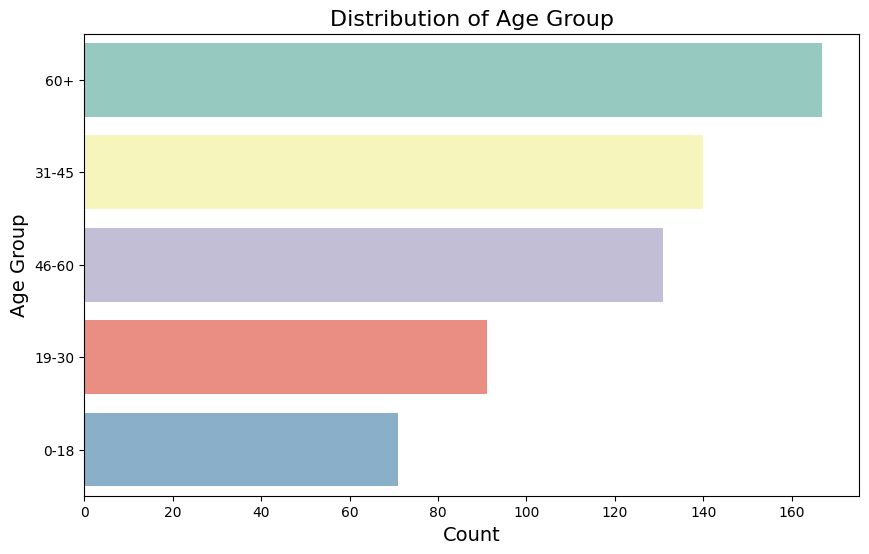


Binary Encoding for City:
   City_0  City_1  City_2  City_3  City_4
0       0       0       0       0       1
1       0       0       0       1       0
2       0       0       0       1       1
3       0       0       1       0       0
4       0       0       1       0       0


In [15]:
import category_encoders as ce


# Categorical Data Columns
nominal_column = 'City'  
ordinal_column = 'Age Group'  

# EDA for Nominal Data
print(f"\nEDA for Nominal Data - {nominal_column}")
print(df[nominal_column].value_counts())

# Bar plot for Nominal Data
plt.figure(figsize=(10, 6))
sns.countplot(df,y=nominal_column, palette='Set2', order=df[nominal_column].value_counts().index)
plt.title(f"Distribution of {nominal_column}", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel(nominal_column, fontsize=14)
plt.show()

#EDA for Ordinal Data 
print(f"\nEDA for Ordinal Data - {ordinal_column}")
print(df[ordinal_column].value_counts())

# Bar plot for Ordinal Data
plt.figure(figsize=(10, 6))
sns.countplot(df,y=ordinal_column, palette='Set3', order=df[ordinal_column].value_counts().index)
plt.title(f"Distribution of {ordinal_column}", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel(ordinal_column, fontsize=14)
plt.show()


# Binary Encoding for Nominal Data
binary_encoder = ce.BinaryEncoder(cols=[nominal_column])
binary_encoded_data = binary_encoder.fit_transform(df[nominal_column])
print(f"\nBinary Encoding for {nominal_column}:")
print(binary_encoded_data.head())

In [16]:
#Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder


age_group_order = ['0-18', '19-30', '31-45', '46-60', '60+']

# Apply OrdinalEncoder with the custom order
ordinal_encoder = OrdinalEncoder(categories=[age_group_order])
df['Age Group Encoded'] = ordinal_encoder.fit_transform(df[['Age Group']])

# Show the result
print(df[['Age Group', 'Age Group Encoded']].head())

#This Output of Label Encoding on Age Group Showcases the Age Group along with the unique identifier which has been assigned to it


  Age Group  Age Group Encoded
0      0-18                0.0
1     31-45                2.0
2     46-60                3.0
3     46-60                3.0
4     31-45                2.0


In [17]:
# One Hot Encoding

import pandas as pd

df_one_hot = pd.get_dummies(df, columns=['City'])

# Display the result
print(df_one_hot.head())

#Converts Each unique City Column into a seperate binary bins  


   Report Number     Date Reported Date of Occurrence Time of Occurrence  \
0              1  02/01/2020 00:00   01/01/2020 00:00   01/01/2020 01:11   
1              2  01/01/2020 19:00   01/01/2020 01:00   01/01/2020 06:26   
2              3  02/01/2020 05:00   01/01/2020 02:00   01/01/2020 14:30   
3              4  01/01/2020 05:00   01/01/2020 03:00   01/01/2020 14:46   
4              5  01/01/2020 21:00   01/01/2020 04:00   01/01/2020 16:51   

   Crime Code Crime Description  Victim Age Victim Gender   Weapon Used  \
0         576    IDENTITY THEFT          16             M  Blunt Object   
1         128          HOMICIDE          37             M        Poison   
2         271        KIDNAPPING          48             F  Blunt Object   
3         170          BURGLARY          49             F       Firearm   
4         421         VANDALISM          30             F         Other   

    Crime Domain  ...  City_Nashik City_Patna City_Pune City_Rajkot  \
0  Violent Crime  ...

In [26]:
#Dummy Encoding
df_dummy = pd.get_dummies(df, columns=['Crime Domain'], drop_first=True)

print(df_dummy)

# It drops the first category of the Crime Domain to avoid collinearity.


     Report Number  Date Reported  Date of Occurrence  Time of Occurrence  \
0                1              4                 312                   0   
1                2              2                 313                   1   
2                3              6                 314                   3   
3                4              0                 315                   4   
4                5              3                 316                   5   
..             ...            ...                 ...                 ...   
595            596            383                 307                 592   
596            597            380                 308                 583   
597            598            366                 309                 587   
598            599            366                 310                 593   
599            600            382                 311                 590   

     City  Crime Code  Crime Description  Victim Age  Victim Gender  \
0   

In [25]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'City' column
df['City_Label_Encoded'] = label_encoder.fit_transform(df['City'])

# Display the result
print(df[['City', 'City_Label_Encoded']].head())
#This Output of Label Encoding on City Showcases the City Names along with the unique identifier which has been assigned to it


   City  City_Label_Encoded
0     1                   1
1     4                   4
2    15                  15
3    21                  21
4    21                  21


In [24]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df['CrimeDomain_Label_Encoded'] = label_encoder.fit_transform(df['Crime Domain'])

print(df[['Crime Domain', 'CrimeDomain_Label_Encoded']].head())

#This Output of Label Encoding on Crime Domain Showcases the Crime Domain along with the unique identifier which has been assigned to it


   Crime Domain  CrimeDomain_Label_Encoded
0             3                          3
1             1                          1
2             1                          1
3             1                          1
4             1                          1


In [22]:
import category_encoders as ce


binary_encoder = ce.BinaryEncoder(cols=['Case Closed'])


df_binary = binary_encoder.fit_transform(df)


print(df_binary.head())

#This Output of Case Closed is displayed in Binary Form as Case Closed(NO) as 0 and Case Closed(YES) as 1

   Report Number  Date Reported  Date of Occurrence  Time of Occurrence  City  \
0              1              4                 312                   0     1   
1              2              2                 313                   1     4   
2              3              6                 314                   3    15   
3              4              0                 315                   4    21   
4              5              3                 316                   5    21   

   Crime Code  Crime Description  Victim Age  Victim Gender  Weapon Used  \
0         576                 11          16              1            0   
1         128                 10          37              1            5   
2         271                 13          48              0            0   
3         170                  2          49              0            2   
4         421                 19          30              0            4   

   Crime Domain  Police Deployed  Case Closed_0  Case Cl

In [38]:
df.drop(['Date of Occurrence', 'Time of Occurrence'], axis=1, inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns


label_encoders = {}


for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  


print(df.head())

#TO CONVERET THE OBJECT COLUMNS TO NUMERICAL


   Report Number  Date Reported  Date of Occurrence  Time of Occurrence  City  \
0              1              4                 312                   0     1   
1              2              2                 313                   1     4   
2              3              6                 314                   3    15   
3              4              0                 315                   4    21   
4              5              3                 316                   5    21   

   Crime Code  Crime Description  Victim Age  Victim Gender  Weapon Used  \
0         576                 11          16              1            0   
1         128                 10          37              1            5   
2         271                 13          48              0            0   
3         170                  2          49              0            2   
4         421                 19          30              0            4   

   Crime Domain  Police Deployed  Case Closed  Date Case

Train Split Test

In [20]:
# Convert category columns to numerical codes
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

# Convert float64 columns to integer (if required) or retain as float
float_columns = df.select_dtypes(include=['float64']).columns
for col in float_columns:
    df[col] = df[col].astype(int) 



print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Report Number       600 non-null    int64
 1   Date Reported       600 non-null    int32
 2   Date of Occurrence  600 non-null    int32
 3   Time of Occurrence  600 non-null    int32
 4   City                600 non-null    int32
 5   Crime Code          600 non-null    int64
 6   Crime Description   600 non-null    int32
 7   Victim Age          600 non-null    int64
 8   Victim Gender       600 non-null    int32
 9   Weapon Used         600 non-null    int32
 10  Crime Domain        600 non-null    int32
 11  Police Deployed     600 non-null    int64
 12  Case Closed         600 non-null    int32
 13  Date Case Closed    600 non-null    int32
dtypes: int32(10), int64(4)
memory usage: 42.3 KB
None


Train Test Split

In [29]:
x=df.iloc[:,0:5]
y=df.iloc[:,5:]


In [61]:
# Numpy arrays for features and target

X=df.drop('Victim Age',axis=1).values
y=df['Victim Age'].values


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=21, stratify=y)



In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Report Number              600 non-null    int64
 1   Date Reported              600 non-null    int32
 2   Date of Occurrence         600 non-null    int32
 3   Time of Occurrence         600 non-null    int32
 4   City                       600 non-null    int32
 5   Crime Code                 600 non-null    int64
 6   Crime Description          600 non-null    int32
 7   Victim Age                 600 non-null    int64
 8   Victim Gender              600 non-null    int32
 9   Weapon Used                600 non-null    int32
 10  Crime Domain               600 non-null    int32
 11  Police Deployed            600 non-null    int64
 12  Case Closed                600 non-null    int32
 13  Date Case Closed           600 non-null    int32
 14  CrimeDomain_Label_Encoded 

In [31]:
# Setup a knn classifier with k neighbors=1

knn = KNeighborsClassifier(n_neighbors=1)

# Fit the KNN model

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.score(X_test,y_test)


0.029166666666666667

The score returned is 0.0291 (approximately 2.9%).
Interpretation:
The score method computes the accuracy of the model, i.e., the ratio of correctly predicted samples to the total samples in X_test.
An accuracy of 2.9% is very low.
It indicates that the KNN model is not performing well on this dataset.

In [33]:
y_pred = knn.predict(X_test)

y_pred represents the predicted values for the test set X_test.

In [34]:
confusion_matrix(y_test,y_pred)


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

The confusion matrix is a 2D array that evaluates the performance of a classification model by comparing the true labels (y_test) with the predicted labels (y_pred).

Each row of the matrix represents the true class, and each column represents the predicted class.

In [35]:
# Obtain Classification Report.

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          13       0.20      0.25      0.22         4
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         2
          18       0.17      0.25      0.20         4
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         4
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         3
          25       0.00      0.00      0.00         3
          26       0.00      0.00      0.00         3
          27       0.12    

c:\Users\Sumit Emmanuel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sumit Emmanuel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sumit Emmanuel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [36]:
# Using elbow method to find best K value.

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

This calculates the error rate for K values ranging from 1 to 40 using the KNN model.
It trains the model on X_train and y_train, predicts on X_test, and computes misclassification rates.
The graph plots K vs. error rate to visually identify the best K value.

Text(0, 0.5, 'Error Rate')

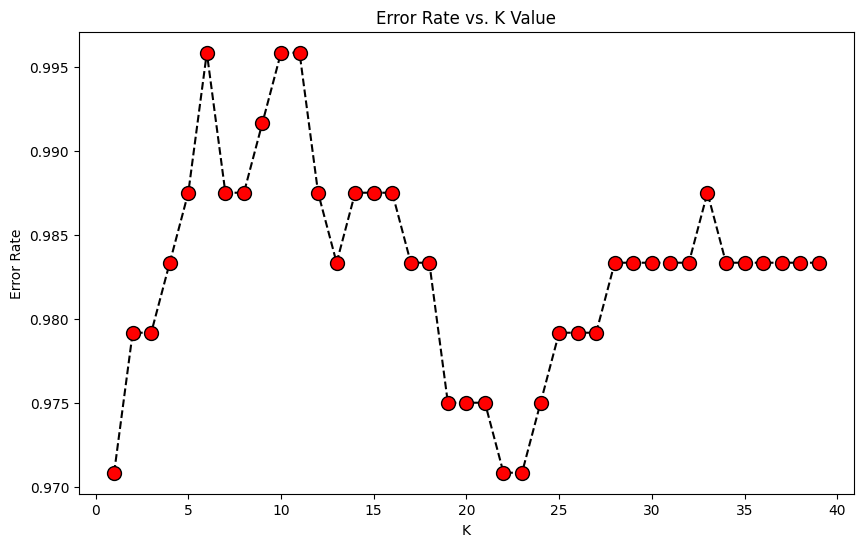

In [37]:
# Plotting the graph for best fitting K value between 1 to 40.

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The error rate remains high (around 0.98-0.99) across all K values.
No clear "elbow point" is observed, meaning increasing K does not improve accuracy.
The consistently high error suggests issues beyond K selection, like unscaled features or noisy data.

In [38]:
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: ",knn.score(X_test,y_test))

              precision    recall  f1-score   support

          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          13       0.20      0.25      0.22         4
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         2
          18       0.17      0.25      0.20         4
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         4
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         3
          25       0.00      0.00      0.00         3
          26       0.00      0.00      0.00         3
          27       0.12    

c:\Users\Sumit Emmanuel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sumit Emmanuel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sumit Emmanuel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

The KNN classifier with n_neighbors=39 performs poorly, yielding very low precision, recall, and F1-scores across all classes, with a macro average F1-score of 2%, indicating severe misclassification or imbalance. The accuracy is also very low, suggesting the model's neighbors parameter or data features need further tuning.

Value of K=3

In [66]:
# Setup a knn classifier with k neighbors=3

knn = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN model

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
print("Accuracy Score:",accuracy_score(y_pred,y_test))


Accuracy Score: 0.2708333333333333


In [68]:
conf_mat=confusion_matrix(y_pred,y_test)  

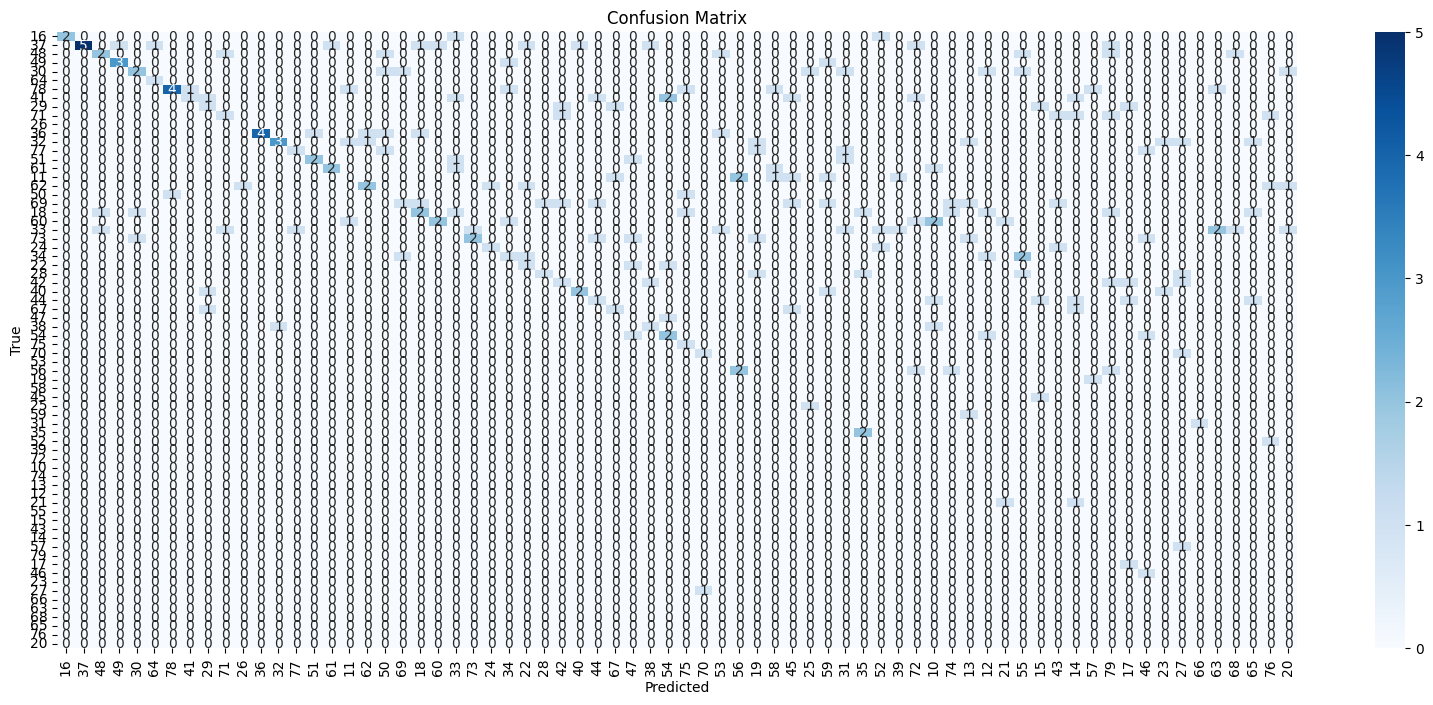

In [75]:

plt.figure(figsize=(20,8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=df["Victim Age"].unique(), yticklabels=df["Victim Age"].unique())

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

This SHows the Predicted and True Values for Victim Age